In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Select numerical columns for scaling
numerical_cols = df_market_data.select_dtypes(include=['number']).columns

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data[numerical_cols])

# Create a new DataFrame with scaled data and keep the original index
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols, index=df_market_data.index)

# Display the first 5 rows
print(df_scaled.head())

# Save the scaled DataFrame (optional)
df_scaled.to_csv("Resources/scaled_crypto_market_data.csv")


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Select numerical columns for scaling
numerical_cols = df_market_data.select_dtypes(include=['number']).columns

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data[numerical_cols])

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols, index=df_market_data.index)

# Copy the crypto names from the original DataFrame (if available)
if "crypto_name" in df_market_data.columns:
    df_scaled["crypto_name"] = df_market_data["crypto_name"]

# Display the first 5 rows of the scaled DataFrame
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [11]:
# Create a list with the number of k-values from 1 to 11
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using df_scaled
    kmeans.fit(df_scaled[numerical_cols])  # Use the scaled numerical columns
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
print(inertia_values)


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[287.0, 212.1233420748626, 170.193570879703, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


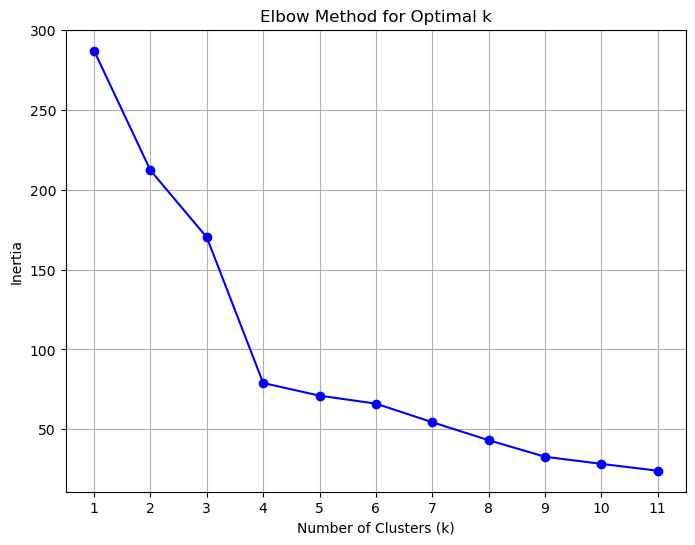

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the k-values and inertia values
elbow_data = {
    'k': range(1, 12),
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


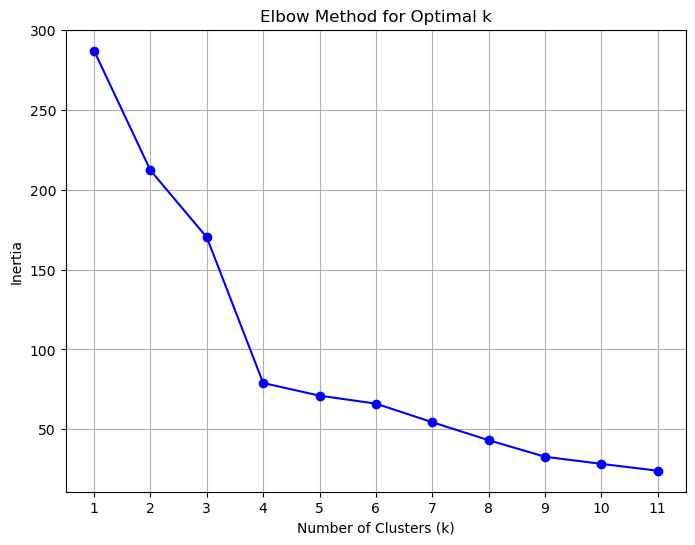

In [14]:
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))  # Ensure the x-axis shows integers from 1 to 11
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for 
𝑘
k in the Elbow Method is typically the point where the inertia starts to decrease at a slower rate, forming an "elbow" shape. This point suggests that adding more clusters doesn't significantly improve the model's performance, as the inertia reduction becomes marginal.

You can visually inspect the plot to find this elbow. Based on typical clustering behavior, the best value for 
𝑘
k would be where the inertia starts to level off, indicating that further increases in 
𝑘
k are not yielding much better clustering results.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [15]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_scaled[numerical_cols])

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Optionally, you can add the cluster labels to the original DataFrame
df_scaled['cluster'] = cluster_labels

# Display the first 5 rows with the cluster labels
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k (e.g., k = 4)
best_k = 4  # Replace with your best k value
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the scaled data (using df_scaled)
kmeans.fit(df_scaled[numerical_cols])

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Optionally, you can add the cluster labels to the original scaled DataFrame
df_scaled['cluster'] = cluster_labels

# Display the first 5 rows with the cluster labels
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans.predict(df_scaled[numerical_cols])

# Print the resulting array of cluster values
print(cluster_predictions)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [18]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

# Display the first 5 rows of the copied DataFrame
print(df_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [19]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['predicted_cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame with the predicted clusters
print(df_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [44]:
import hvplot.pandas  # Import hvplot for DataFrame plotting

# Create a scatter plot with hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="predicted_cluster",  # Color by the predicted clusters
    hover_cols=["crypto_name"],  # Show the cryptocurrency name on hover
    title="Cryptocurrency Clusters by Price Change Percentage"
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)


In [22]:
# Use the PCA model with fit_transform to reduce the original scaled DataFrame
pca_components = pca.fit_transform(df_scaled[numerical_cols])

# Create a DataFrame for the reduced PCA data with 3 components
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the scaled PCA data
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [23]:
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print(f"Explained Variance by PC1: {explained_variance[0]:.4f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.4f}")
print(f"Explained Variance by PC3: {explained_variance[2]:.4f}")


Explained Variance by PC1: 0.3720
Explained Variance by PC2: 0.3470
Explained Variance by PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895


In [26]:
# Create a new DataFrame with the PCA data
df_pca_final = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# Copy the crypto names from the original scaled DataFrame
if "crypto_name" in df_scaled.columns:
    df_pca_final["crypto_name"] = df_scaled["crypto_name"]

# Set the coin_id column as index
df_pca_final['coin_id'] = df_scaled.index

# Set the 'coin_id' column as the index of the new DataFrame
df_pca_final.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_pca_final.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [27]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [28]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-reduced data (df_pca_final)
    kmeans.fit(df_pca_final[['PC1', 'PC2', 'PC3']])  # Using the 3 principal components
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
print(inertia_values)



c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[256.8740855678925, 182.33953007775648, 140.4318329840836, 49.6654966517974, 42.051901097917266, 31.749005244389046, 28.031869172552767, 19.451747206041368, 13.814081971558103, 10.630647573870975, 10.120242629957769]


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
import pandas as pd

# Create a dictionary with the k-values and inertia values
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values  # Inertia values computed earlier
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



     k     inertia
0    1  256.874086
1    2  182.339530
2    3  140.431833
3    4   49.665497
4    5   42.051901
5    6   31.749005
6    7   28.031869
7    8   19.451747
8    9   13.814082
9   10   10.630648
10  11   10.120243


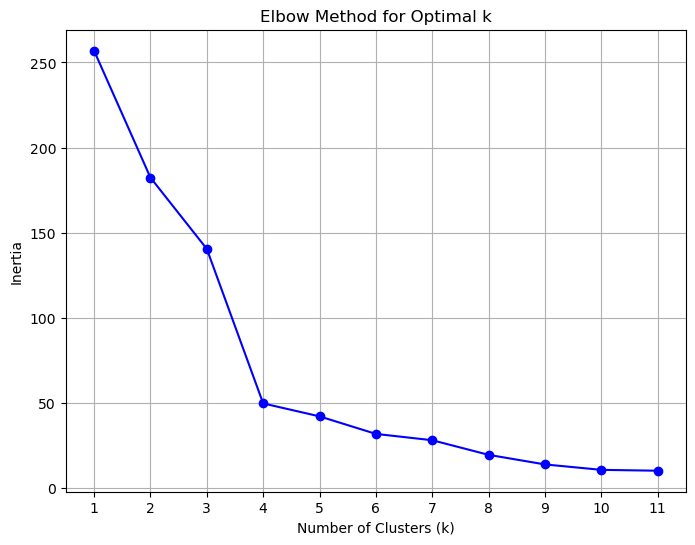

In [30]:
import matplotlib.pyplot as plt

# Plot a line chart with the inertia values computed with different k-values
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Ensure the x-axis shows integers from 1 to 11
plt.grid(True)
plt.show()


#### Answer the following questions: 

1. What is the best value for k when using the PCA data?
The best value for 
𝑘
k when using PCA-reduced data can be identified from the Elbow curve you plotted earlier. The "elbow" point is where the inertia begins to decrease at a slower rate, indicating that adding more clusters doesn't significantly improve the model.

By examining the plot, you should be able to pinpoint the 
𝑘
k value where the inertia levels off. Typically, the optimal 
𝑘
k might be around the point where the curve starts to flatten, as further increases in 
𝑘
k result in minimal reduction in inertia.

2. Does it differ from the best k value found using the original data?
The optimal 
𝑘
k value might differ when using the PCA data compared to the original data because PCA reduces the dimensionality of the data, which can affect the clustering structure. Since PCA captures the most significant variance in fewer dimensions, the clusters formed in the reduced space may differ in terms of the number of clusters needed to explain the data.

To determine if the best 
𝑘
k differs, you can compare the Elbow plot based on the original data to the one from the PCA data. If the "elbow" point in both plots is similar, the optimal 
𝑘
k value will likely be the same. If there is a noticeable difference in the location of the "elbow," the best 
𝑘
k value may differ.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [31]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Set the best k value (replace this with the actual best k value you identified)
best_k = 4  # Example: replace 4 with your optimal k

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the PCA-reduced data
kmeans.fit(df_pca_final[['PC1', 'PC2', 'PC3']])

# Optionally, you can get the cluster labels
cluster_labels = kmeans.labels_

# Display the first few rows of the cluster labels
print(cluster_labels[:10])


[0 0 2 2 0 0 0 0 0 2]


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
# Fit the K-Means model using the PCA data (PC1, PC2, PC3)
kmeans.fit(df_pca_final[['PC1', 'PC2', 'PC3']])

# Optionally, get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the PCA DataFrame
df_pca_final['predicted_cluster'] = cluster_labels

# Display the first few rows of the updated PCA DataFrame with cluster labels
print(df_pca_final.head())



                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  2
ripple       -0.471835 -0.222660 -0.479053                  2
bitcoin-cash -1.157800  2.041209  1.859715                  0


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
# Predict the clusters using the fitted K-Means model
cluster_predictions = kmeans.predict(df_pca_final[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values
print(cluster_predictions)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [34]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca_final.copy()

# Add a new column with the predicted clusters
df_pca_copy['predicted_cluster'] = cluster_predictions

# Display the copy of the scaled PCA DataFrame with the new cluster column
print(df_pca_copy.head())


                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  2
ripple       -0.471835 -0.222660 -0.479053                  2
bitcoin-cash -1.157800  2.041209  1.859715                  0


In [35]:
import hvplot.pandas  # Ensure hvPlot is imported for Pandas DataFrame plotting

# Create a scatter plot using hvPlot with x="PC1" and y="PC2"
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='predicted_cluster',  # Color points based on predicted clusters
    cmap='viridis',  # Color map for the clusters
    hover_cols=['crypto_name'],  # Show cryptocurrency name on hover
    title='PCA Scatter Plot of Cryptocurrencies',
    height=400,
    width=600
)

# Display the plot
scatter_plot


:Scatter   [PC1]   (PC2,predicted_cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

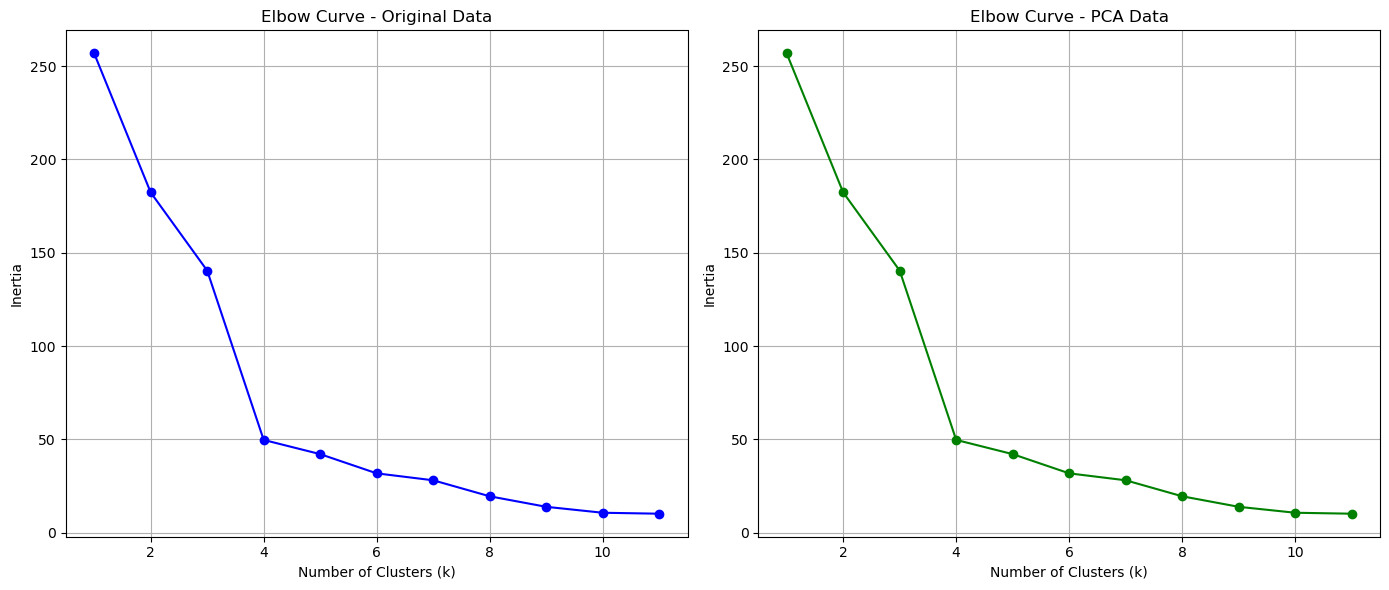

In [56]:
import matplotlib.pyplot as plt

# Assuming you have inertia values for both original and PCA-reduced data
# inertia_values_original: inertia for the original data
# inertia_values: inertia for the PCA-reduced data
# k_values: List of k-values (from 1 to 11)

# Create the figure and axes for the composite plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow curve for the original data (using original inertia values)
ax[0].plot(k_values,inertia_values, marker='o', linestyle='-', color='b')
ax[0].set_title('Elbow Curve - Original Data')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

# Plot the Elbow curve for the PCA-reduced data (using PCA inertia values)
ax[1].plot(k_values, inertia_values, marker='o', linestyle='-', color='g')
ax[1].set_title('Elbow Curve - PCA Data')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Inertia')
ax[1].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the composite plot
plt.show()


In [57]:
from sklearn.cluster import KMeans

# Assuming you have already scaled the original data into df_market_data_scaled

# Define the best k (e.g., 4 from the elbow method or your analysis)
k = 4

# Initialize and fit the KMeans model to the original scaled data
kmeans_original = KMeans(n_clusters=k, random_state=42)
cluster_labels_original = kmeans_original.fit_predict(df_market_data_scaled)

# Add the cluster labels to the scaled data (optional for reference)
df_market_data_scaled['cluster_original'] = cluster_labels_original


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
# Assuming you have already reduced the data to PCA (df_pca_final with PC1, PC2, etc.)

# Initialize and fit the KMeans model to the PCA-reduced data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(df_pca_final[['PC1', 'PC2', 'PC3']])

# Add the cluster labels to the PCA data (optional for reference)
df_pca_final['cluster_pca'] = cluster_labels_pca


c:\Users\sylve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


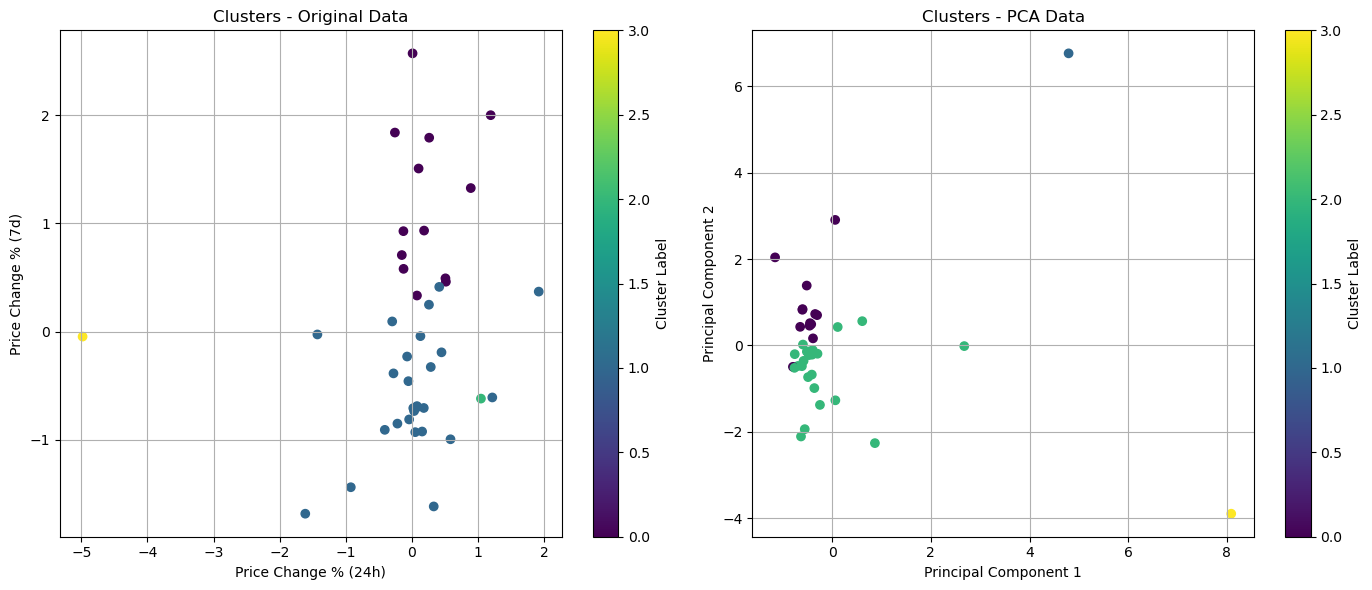

In [59]:
import matplotlib.pyplot as plt

# Create the figure and axes for the composite plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the clusters for the original data
scatter1 = ax[0].scatter(df_market_data_scaled['price_change_percentage_24h'], 
                         df_market_data_scaled['price_change_percentage_7d'], 
                         c=cluster_labels_original, cmap='viridis', marker='o')
ax[0].set_title('Clusters - Original Data')
ax[0].set_xlabel('Price Change % (24h)')
ax[0].set_ylabel('Price Change % (7d)')
ax[0].grid(True)

# Plot the clusters for the PCA-reduced data
scatter2 = ax[1].scatter(df_pca_final['PC1'], 
                         df_pca_final['PC2'], 
                         c=cluster_labels_pca, cmap='viridis', marker='o')
ax[1].set_title('Clusters - PCA Data')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].grid(True)

# Add colorbars to both plots
fig.colorbar(scatter1, ax=ax[0], orientation='vertical', label='Cluster Label')
fig.colorbar(scatter2, ax=ax[1], orientation='vertical', label='Cluster Label')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the composite plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through dimensionality reduction like PCA simplifies the data and makes clustering faster and easier to visualize. However, this can lead to a loss of important information, which might impact the accuracy and interpretability of the clusters. While it improves computational efficiency, the reduced features might not capture all the complexities of the original data, potentially leading to less meaningful cluster separation.